### 선형회귀 모델
- 특징이 하나인 경우 어떤 직선을 학습하는 알고리즘
- 특징을 가장 잘 나타낼 수 있는 직선
- 상관분석을 통해서 양의 상관관계, 음의 상관관계가 있을 때만 사용

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [4]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [5]:
lr = LinearRegression()  #선형회귀모델

lr.fit(train_input, train_target)

LinearRegression()

In [6]:
# 50cm 농어에 무게를 예측
print(lr.predict([[50]]))

[1241.83860323]


직선의 방정식 = > $y=ax+b$
  
- y: 농어 무게
- x: 농어 길이
- a: 기울기 -> coefficient(계수), 가중치(weight)
- b: 절편 -> 편향(bias)

In [7]:
# coef: 기울기 , intercept: 절편
print(lr.coef_, lr.intercept_)

[39.01714496] -709.018644953547


### 다항회귀
> 선형회귀의 한계를 보완, 다항식을 이용한 선형회귀

In [10]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [11]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [12]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [13]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278293


In [18]:
point = np.arange(15,50)  #15~49까지 정수배열 만듦

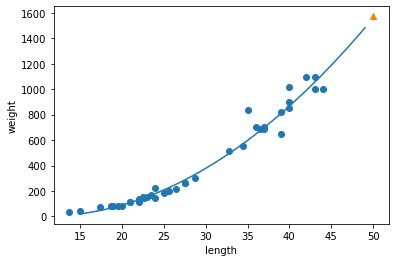

In [17]:
plt.scatter(train_input, train_target) #훈련세트의 산점도 그리기
plt.plot(point, 1.01*point**2 - 21.6*point+116.05)
plt.scatter(50,1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
print(lr.score(train_poly, train_target))  #accuracy 분석
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


#### 아직도 약간 과소적합 되었음. test 세트의 점수가 더 높음